In [1]:
from google.colab import drive
from bs4 import BeautifulSoup
import requests

!pip install scikit-learn
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

import matplotlib.pyplot as plt
!pip install vadersentiment
!pip install textblob

from sklearn.metrics import confusion_matrix, roc_curve, auc

import lightgbm as lgb
from lightgbm import LGBMClassifier

import os

import torch
from transformers import BertTokenizer, BertModel
import seaborn as sns


!pip install sentence_transformers
!pip install pandas nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec

import numpy as np

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manyl

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
#CODE FOR WEB SCRAPPING NEWS TITLE OF BOEING COMPANY FROM MARKET INSIDER

url = 'https://markets.businessinsider.com/news/ba-stock'
bh=[]
#I have scrapped 210 pages of information for the Boeing stock

for i in range(1,210) :
  url2=url+'?p='+str(i)
  res = requests.get(url2)
  html = res.text
  soup = BeautifulSoup(html,'lxml')
  columns = ['datetime','title']
  #From the appropriate class,i have extracted useful textual data

  df=pd.DataFrame(columns=columns)
  articles= soup.find_all('div',class_='latest-news__story')
  for article in articles:
    datetime = article.find('time',class_='latest-news__date').get('datetime')
   # print(datetime)
    title = article.find('a',class_='news-link').text
    bh.append([datetime,title])
    df=pd.DataFrame(bh,columns=df.columns)
#Csv sheet is created to add these data in respective column and saved in drive

df['date'] = pd.to_datetime(df['datetime']).dt.date
drive.mount('drive', force_remount = True)
df.to_csv('dfboeing.csv')
!cp dfboeing.csv "drive/My Drive/"

<ipython-input-3-409e0c063cb8>:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['datetime']).dt.date


Mounted at drive


In [4]:
#Edition are made in csv file to merge all news of same date into one entry only

bl = pd.read_csv('dfboeing.csv')
df2 = bl.groupby('date')['title'].apply(''.join).reset_index()
print(df2)

            date                                              title
0     2013-12-05  Boeing may spend $10 billion on 777X jet plant...
1     2013-12-06  U.S. lawmaker urges continuation of Boeing F/A...
2     2013-12-09  Boeing must decide on F/A-18 production in Mar...
3     2013-12-10  Boeing sees export credits waning as aircraft ...
4     2013-12-11  Union machinists say they held talks with Boei...
...          ...                                                ...
2152  2024-06-13  The 3 Best Aviation Stocks to Buy (Sorry, Boei...
2153  2024-06-14  FAA Probes Into Counterfeit Titanium Used In S...
2154  2024-06-17  3 Defense Stocks to Sell in June Before They C...
2155  2024-06-18  Boeing (BA) Gets a Buy from TD CowenBoeing’s M...
2156  2024-06-19  3 Industrial Stocks to Sell in June Before The...

[2157 rows x 2 columns]


In [5]:
#This is written for tokenising and cleaning new title of Boeing Stock

lemmatizer = WordNetLemmatizer()
def clean_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    #It removes all all stop words from news title

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalpha() and word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)
#Formation of a new column for cleaned title text which has final outcome of cleaning

df2['cleaned_title'] = df2['title'].apply(clean_text)
print(df2)


            date                                              title  \
0     2013-12-05  Boeing may spend $10 billion on 777X jet plant...   
1     2013-12-06  U.S. lawmaker urges continuation of Boeing F/A...   
2     2013-12-09  Boeing must decide on F/A-18 production in Mar...   
3     2013-12-10  Boeing sees export credits waning as aircraft ...   
4     2013-12-11  Union machinists say they held talks with Boei...   
...          ...                                                ...   
2152  2024-06-13  The 3 Best Aviation Stocks to Buy (Sorry, Boei...   
2153  2024-06-14  FAA Probes Into Counterfeit Titanium Used In S...   
2154  2024-06-17  3 Defense Stocks to Sell in June Before They C...   
2155  2024-06-18  Boeing (BA) Gets a Buy from TD CowenBoeing’s M...   
2156  2024-06-19  3 Industrial Stocks to Sell in June Before The...   

                                          cleaned_title  
0     boeing may spend billion jet plant reportairbu...  
1     lawmaker urge continuatio

In [6]:
#Below code is for transforming textual cleaned title text into vector by running it on Word2vec

sentences = df2['cleaned_title'].apply(lambda x: x.split()).tolist()
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
#Defining of word2vec function for transformation

def word2vec(words, model, num_features):
    feature_vec = np.zeros((num_features,), dtype="float32")
    nwords = 0

    index2word_set = set(model.wv.index_to_key)

    for word in words:
        if word in index2word_set:
            nwords += 1
            feature_vec = np.add(feature_vec, model.wv[word])

    if nwords > 0:
        feature_vec = np.divide(feature_vec, nwords)

    return feature_vec
num_features = 100
#Added column named features which has vectors obtained via above defined function

df2['Word2Vec_Features'] = df2['cleaned_title'].apply(lambda x: word2vec(x, model, num_features))
print(df2[['title', 'Word2Vec_Features']])

                                                  title  \
0     Boeing may spend $10 billion on 777X jet plant...   
1     U.S. lawmaker urges continuation of Boeing F/A...   
2     Boeing must decide on F/A-18 production in Mar...   
3     Boeing sees export credits waning as aircraft ...   
4     Union machinists say they held talks with Boei...   
...                                                 ...   
2152  The 3 Best Aviation Stocks to Buy (Sorry, Boei...   
2153  FAA Probes Into Counterfeit Titanium Used In S...   
2154  3 Defense Stocks to Sell in June Before They C...   
2155  Boeing (BA) Gets a Buy from TD CowenBoeing’s M...   
2156  3 Industrial Stocks to Sell in June Before The...   

                                      Word2Vec_Features  
0     [-0.085279696, 0.027124036, 0.026501844, 0.087...  
1     [-0.075024165, 0.023537468, 0.02181872, 0.0795...  
2     [-0.119436175, 0.042306725, 0.03912881, 0.1259...  
3     [-0.07665062, 0.02424603, 0.023136152, 0.08052...  
4

In [7]:
#It is important to set hugging face token as an Environment Variable
#below is code for it (authenticating access to Hugging Face Model)
import os
os.environ['HF_TOKEN'] = 'collab'
#Defining a function to add more feature with the help of FinBERT model

def FinBERT_Feature(text, model, tokenizer):
    #Transforms text into tensors sc(tokenize)

    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding='max_length')
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state
    feature_vector = last_hidden_state.mean(dim=1).cpu().numpy().flatten()
    return feature_vector
finbert_model = BertModel.from_pretrained('yiyanghkust/finbert-tone')
finbert_tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
#Adding column to save FinBERT feature extracted from cleaned title text

df2['FinBERT_Features'] = df2['cleaned_title'].apply(lambda text: FinBERT_Feature(text, finbert_model, finbert_tokenizer))
finbert_feature = pd.DataFrame(df2['FinBERT_Features'].to_list(), columns=[f'FinBERT_{i}' for i in range(len(df2['FinBERT_Features'][0]))])
word2vec_feature = pd.DataFrame(df2['Word2Vec_Features'].to_list(), columns=[f'Word2Vec_{i}' for i in range(len(df2['Word2Vec_Features'][0]))])

final_data4 = pd.concat([df2, finbert_feature, word2vec_feature], axis=1)
final_data4.drop(['FinBERT_Features', 'Word2Vec_Features'], axis=1, inplace=True)

print(final_data4)


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

            date                                              title  \
0     2013-12-05  Boeing may spend $10 billion on 777X jet plant...   
1     2013-12-06  U.S. lawmaker urges continuation of Boeing F/A...   
2     2013-12-09  Boeing must decide on F/A-18 production in Mar...   
3     2013-12-10  Boeing sees export credits waning as aircraft ...   
4     2013-12-11  Union machinists say they held talks with Boei...   
...          ...                                                ...   
2152  2024-06-13  The 3 Best Aviation Stocks to Buy (Sorry, Boei...   
2153  2024-06-14  FAA Probes Into Counterfeit Titanium Used In S...   
2154  2024-06-17  3 Defense Stocks to Sell in June Before They C...   
2155  2024-06-18  Boeing (BA) Gets a Buy from TD CowenBoeing’s M...   
2156  2024-06-19  3 Industrial Stocks to Sell in June Before The...   

                                          cleaned_title  FinBERT_0  FinBERT_1  \
0     boeing may spend billion jet plant reportairbu...   0.123750

In [8]:
                                        #NOTE#

#Extracted some numerical data(open,high,close,low,etc) available online from certain websites
#This data file was then saved in Drive

#Reading the data from a file saved in drive
#Merging the numerical Data of Boeing Stocks with the textual data of same data,merging data of two files

fpath = 'drive/MyDrive/dfboeing1.csv'
f2path = 'drive/MyDrive/BA_data.csv'
k1 = pd.read_csv(fpath)
k2 = pd.read_csv(f2path)
k1['date'] = pd.to_datetime(k1['date'])
k2['date'] = pd.to_datetime(k2['date'])
merged_df = pd.merge(k2, k1, on='date')

merged_path = 'drive/MyDrive/eerocks.csv'
merged_df.to_csv(merged_path, index=False)
merged_df.head()

<ipython-input-8-8baa924b111f>:14: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  k2['date'] = pd.to_datetime(k2['date'])


,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 7,Label,Unnamed: 0,...,Word2Vec_96,Word2Vec_97,Word2Vec_98,Word2Vec_99,Subjectivity,Polarity,negative,positive,neutral,compound
0,2013-11-27,135.050003,136.300003,134.169998,134.720001,115.141357,3350900,NaN,0,0,...,0.126692,-0.140628,0.036088,0.059370,0.2,-0.3,0.487,0.000,0.513,-0.6908
1,2013-12-04,131.729996,132.149994,130.550003,131.500000,112.389305,5137100,NaN,0,1,...,0.050701,-0.057744,0.011423,0.024825,0.0,0.0,0.342,0.000,0.658,-0.3818
2,2013-12-05,131.259995,133.100006,131.250000,132.729996,113.440529,3665100,NaN,1,2,...,0.110265,-0.121421,0.030225,0.050843,0.0,0.0,0.167,0.000,0.833,-0.3400
3,2013-12-06,134.580002,135.750000,134.000000,135.179993,115.534477,5341800,NaN,1,3,...,0.094339,-0.105173,0.026623,0.045045,0.4,0.8,0.000,0.351,0.649,0.6597
4,2013-12-09,135.490005,135.949997,134.570007,134.679993,115.107155,3799000,NaN,0,4,...,0.158758,-0.174369,0.042536,0.067946,0.0,0.0,0.000,0.000,1.000,0.0000


In [9]:
import sentence_transformers
from sentence_transformers import SentenceTransformer

In [10]:
#Here i am selecting specific column oF eerocks.csv to create new dataframe
#Below are two newly created Dataframe

merged_df2=merged_df.drop(columns=['High','Low','Close','cleaned_title','title','date','Unnamed: 7','Unnamed: 0'])
merged_df1=merged_df[['Open','High','Low','Close','Volume','Polarity','Subjectivity','negative','positive','neutral','Label']]
print(merged_df2)

            Open   Adj Close   Volume  Label  FinBERT_0  FinBERT_1  FinBERT_2  \
0     135.050003  115.141357  3350900      0  -0.786365  -0.272921  -1.342853   
1     131.729996  112.389305  5137100      0  -0.259411   0.502727  -1.334550   
2     131.259995  113.440529  3665100      1   0.123750  -0.372667  -0.083055   
3     134.580002  115.534477  5341800      1  -0.180468  -0.270638  -0.875695   
4     135.490005  115.107155  3799000      0  -0.292767   0.391161  -0.211916   
...          ...         ...      ...    ...        ...        ...        ...   
1873  190.460007  190.240005  3374500      0  -0.633474  -0.166272   0.961044   
1874  190.000000  190.119995  4388300      1  -0.047047  -0.777776   0.319869   
1875  189.320007  185.500000  5010100      0   0.243369  -1.591026  -0.140793   
1876  186.500000  182.669998  5245200      0   0.001718  -0.592231   0.777712   
1877  181.740005  180.699997  4201000      0   0.396879  -0.465107   0.656286   

      FinBERT_3  FinBERT_4 

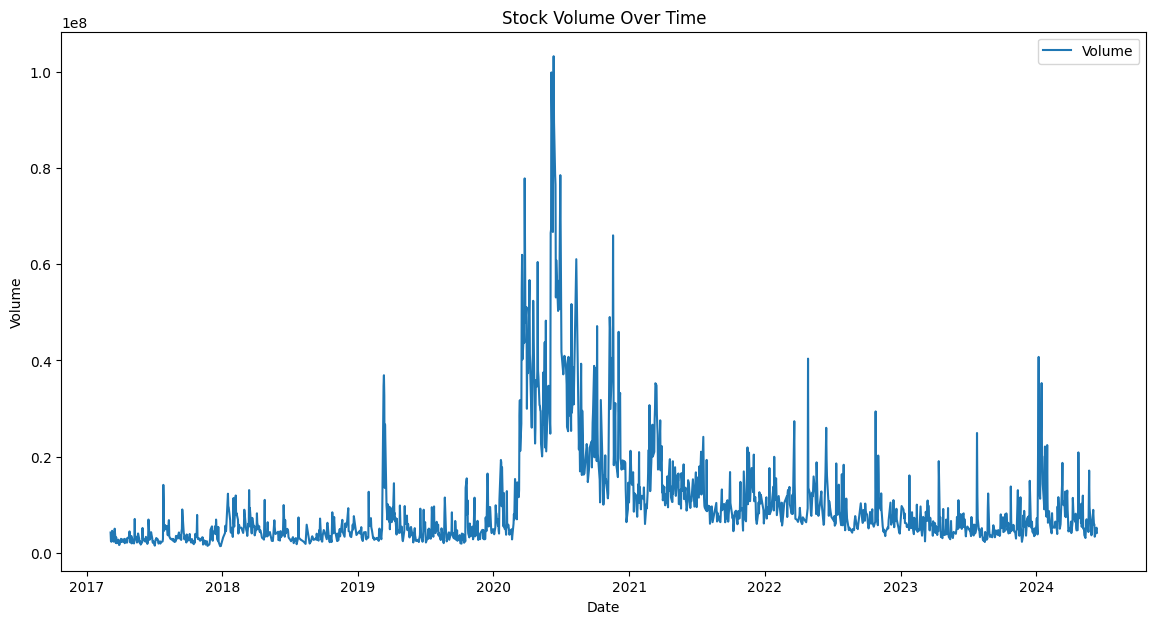

In [11]:
#Here i have written the code to obtain graph of Stock Prices Over Time
#On X axis we have date and on Y axis we have Close Price of Boeing Stock for that date

subset_df = merged_df.tail(1500)
plt.figure(figsize=(14, 7))
plt.plot(subset_df['date'], subset_df['Volume'], label='Volume')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

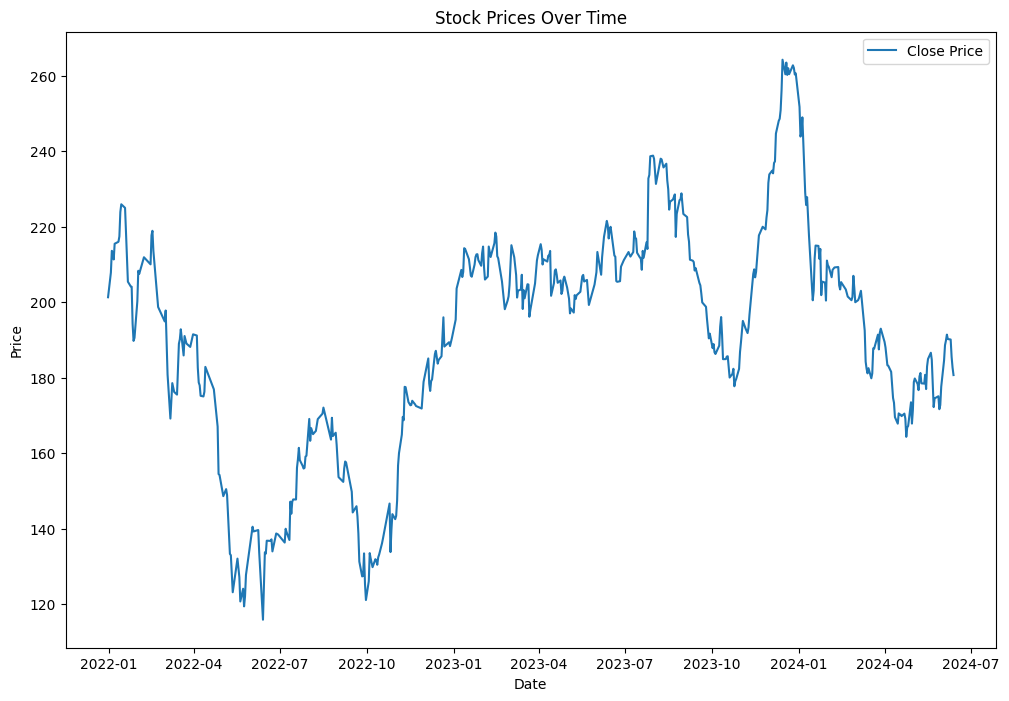

In [12]:
#Here i have written the code to obtain graph of Stock Volume Over Time
#On X axis we have date and on Y axis we have Volume of Apple Stock for that date

subset_df = merged_df.tail(500)
plt.figure(figsize=(12, 8))
plt.plot(subset_df['date'], subset_df['Close'], label='Close Price')

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [13]:
                                          #NOTE#

#FROM HERE ON WE ARE TRAINING 3 DIFFERENT FINE TUNED ML MODELS
#FURTHER WE WILL ENSEMBLE THEM TO GET THE BEST ML MODEL USING BEST PARAMETER AND HAVING BETTER ACCURACY

                                      # MODEL-1 #
# Logistic Regression

X=merged_df2.drop(['Label'],axis=1)
y=merged_df2['Label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#For fine tuning i am using hyper parameter tuning with grid search


param_grid={
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
    }
model1 = LogisticRegression()
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_logreg = grid_search.best_estimator_
y_pred1= best_logreg.predict(X_test)

#Below is the code for printing results of Model-1

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Fitting 5 folds for each of 75 candidates, totalling 375 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Best parameters found:  {'C': 0.01, 'max_iter': 100, 'solver': 'newton-cg'}
Accuracy: 0.6861702127659575
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       186
           1       0.68      0.71      0.69       190

    accuracy                           0.69       376
   macro avg       0.69      0.69      0.69       376
weighted avg       0.69      0.69      0.69       376



/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [14]:
# Convert y_pred to a Pandas Series with the same index as X_test
import pandas as pd

y_pred_series = pd.Series(y_pred1, index=X_test.index, name='Predicted_Label')

# Now you can merge
result_df = pd.merge(X_test, y_pred_series, left_index=True, right_index=True)
final_df = pd.merge(result_df,merged_df, on=['Adj Close','Volume'],how='inner')
final_df=final_df.drop(['Unnamed: 0','Unnamed: 7'],axis=1)
column1=['Open_x','Close','Predicted_Label']
final_df=pd.DataFrame(final_df[column1])
print(final_df)

#Csv sheet is created to add these data in respective column and saved in drive

drive.mount('drive', force_remount = True)
final_df.to_csv('l12.csv')
!cp l12.csv "drive/My Drive/"

         Open_x       Close  Predicted_Label
0    178.000000  176.449997                0
1    139.130005  139.630005                1
2    211.789993  214.220001                1
3    364.619995  370.160004                1
4    131.750000  133.470001                1
..          ...         ...              ...
371  231.770004  233.869995                1
372  156.490005  155.679993                0
373  350.410004  351.119995                1
374  180.750000  179.539993                1
375  339.790009  330.260010                0

[376 rows x 3 columns]
Mounted at drive


In [15]:

                                      # MODEL-2 #
# ADA Boost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = merged_df2.drop(['Label'], axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#For fine tuning i am using hyper parameter tuning with grid search

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}
base_estimator = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42,algorithm='SAMME')
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_ada_model = grid_search.best_estimator_
y_pred = best_ada_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.4973404255319149
              precision    recall  f1-score   support

           0       0.49      0.55      0.52       186
           1       0.50      0.45      0.47       190

    accuracy                           0.50       376
   macro avg       0.50      0.50      0.50       376
weighted avg       0.50      0.50      0.50       376



In [16]:
                                      # MODEL-3 #

# Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = merged_df2.drop(['Label'],axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
#For fine tuning i am using hyper parameter tuning with grid search

param_grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': [None, 'auto'] + list(np.linspace(0, 1, 10))
}
grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lda = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
y_pred = best_lda.predict(X_test)
#Below is the code for printing results of Model-3

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best parameters found: {'shrinkage': None, 'solver': 'lsqr'}
Accuracy: 0.6436170212765957
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.68       186
           1       0.69      0.54      0.60       190

    accuracy                           0.64       376
   macro avg       0.65      0.64      0.64       376
weighted avg       0.65      0.64      0.64       376



In [21]:
# Here i am ensembling the 3 ML models for getting better Output

#Ensemble Model

X = merged_df2.drop(['Label'], axis=1)
y = merged_df2['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)
ensemble=VotingClassifier(estimators=[('lr',best_logreg),('ada',best_ada_model),('lda',lda)],voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

#Below is the code for printing results of Ensemble Model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


0.5797872340425532
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       198
           1       0.55      0.57      0.56       178

    accuracy                           0.58       376
   macro avg       0.58      0.58      0.58       376
weighted avg       0.58      0.58      0.58       376



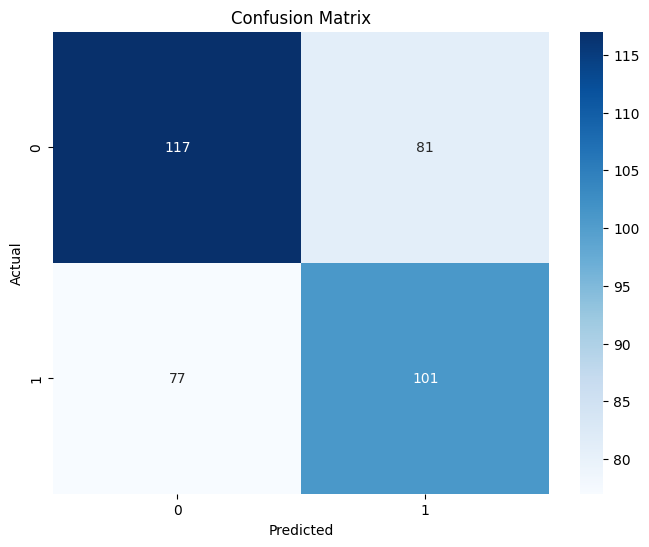

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


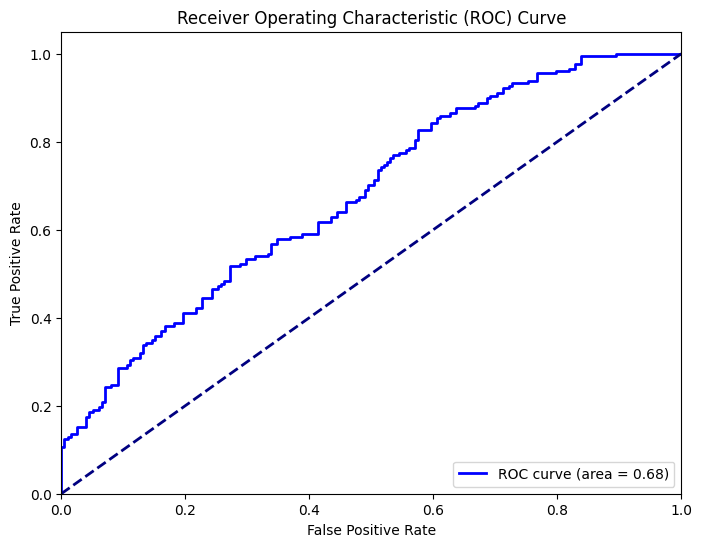

In [25]:
#Here is the code for getting Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Here is the code for getting ROC Curve
ensemble=VotingClassifier(estimators=[('lr',best_logreg),('ada',best_ada_model),('lda',lda)],voting='soft')
ensemble.fit(X_train, y_train)
y_prob = ensemble.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()